# **Pengumpulan dan Persiapan Data**

In [1]:
# Mempersiapkann library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Set seed global untuk reprodusibilitas
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Pembagian Data

In [3]:
'''
import os
import random
import shutil

# Path asal folder berisi semua gambar
source_dir = r'D:\SEMESTER 6\AI for DS\klasifikasi_outfit\raw_outfit'
target_dir = 'dataset'

# Kategori
categories = ['atasan', 'bawahan', 'alaskaki']

# Rasio pembagian
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for category in categories:
    src_path = os.path.join(source_dir, category)
    all_files = os.listdir(src_path)
    random.shuffle(all_files)

    total = len(all_files)
    train_count = int(total * train_ratio)
    val_count = int(total * val_ratio)

    train_files = all_files[:train_count]
    val_files = all_files[train_count:train_count + val_count]
    test_files = all_files[train_count + val_count:]

    # Fungsi copy file ke folder target
    def copy_files(files, subset):
        dst_dir = os.path.join(target_dir, subset, category)
        os.makedirs(dst_dir, exist_ok=True)
        for file in files:
            shutil.copy(os.path.join(src_path, file), os.path.join(dst_dir, file))

    # Pindahkan ke masing-masing subset
    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

print("Dataset berhasil dibagi ke train, val, dan test.")
'''

'\nimport os\nimport random\nimport shutil\n\n# Path asal folder berisi semua gambar\nsource_dir = r\'D:\\SEMESTER 6\\AI for DS\\klasifikasi_outfit\raw_outfit\'\ntarget_dir = \'dataset\'\n\n# Kategori\ncategories = [\'atasan\', \'bawahan\', \'alaskaki\']\n\n# Rasio pembagian\ntrain_ratio = 0.8\nval_ratio = 0.1\ntest_ratio = 0.1\n\nfor category in categories:\n    src_path = os.path.join(source_dir, category)\n    all_files = os.listdir(src_path)\n    random.shuffle(all_files)\n\n    total = len(all_files)\n    train_count = int(total * train_ratio)\n    val_count = int(total * val_ratio)\n\n    train_files = all_files[:train_count]\n    val_files = all_files[train_count:train_count + val_count]\n    test_files = all_files[train_count + val_count:]\n\n    # Fungsi copy file ke folder target\n    def copy_files(files, subset):\n        dst_dir = os.path.join(target_dir, subset, category)\n        os.makedirs(dst_dir, exist_ok=True)\n        for file in files:\n            shutil.copy(os.

## Input Data dan Preprocessing Data

In [4]:
# Direktori
train_path = 'D:/SEMESTER 6/AI for DS/klasifikasi_outfit/dataset/train'
test_path = 'D:/SEMESTER 6/AI for DS/klasifikasi_outfit/dataset/test'
val_path = 'D:/SEMESTER 6/AI for DS/klasifikasi_outfit/dataset/val'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=20,
                                    shear_range=0.2,
                                    zoom_range=0.1,
                                    fill_mode='nearest',
                                    horizontal_flip=True,
                                    vertical_flip=False)

train_set = train_datagen.flow_from_directory(train_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_set = val_datagen.flow_from_directory(val_path,
                                            batch_size=32,
                                            target_size=(128, 128),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

Found 360 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


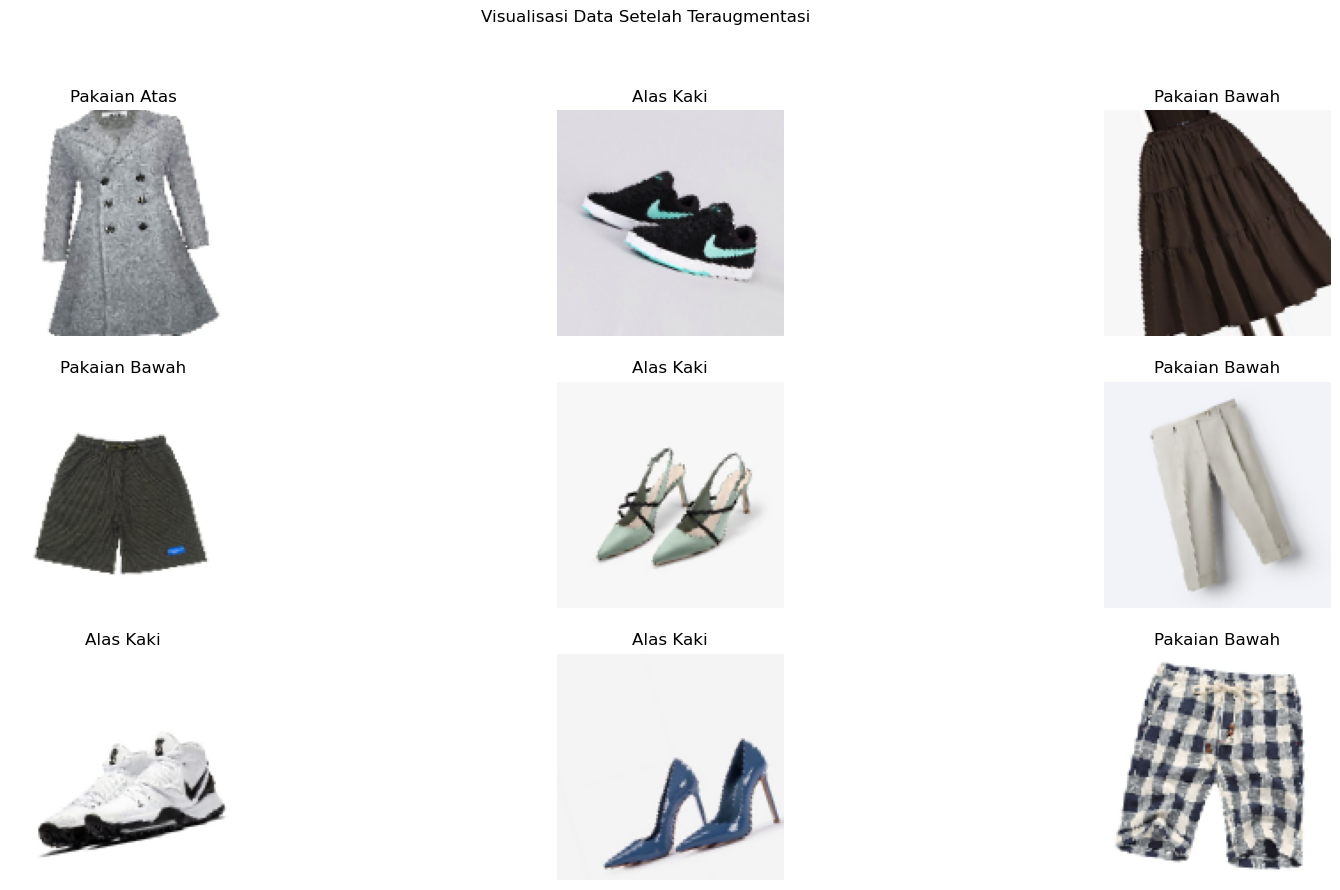

In [6]:
# Nama Kelas
class_names = ['Alas Kaki', 'Pakaian Atas', 'Pakaian Bawah']

# Visualisasi Data setelah teraugmentasi
plt.figure(figsize=(20, 10))
plt.suptitle('Visualisasi Data Setelah Teraugmentasi')
images, labels = train_set.next()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
    
plt.show()

In [7]:
# Inisialisasi list
file_name = []
tag = []
subset = []
full_path = []

# Path utama dataset
main_dataset_path = 'dataset'

# Telusuri train, val, dan test
for split in ['train', 'val', 'test']:
    split_path = os.path.join(main_dataset_path, split)
    
    for path, subdirs, files in os.walk(split_path):
        for name in files:
            full_path.append(os.path.join(path, name))                      # Path Lengkap File
            tag.append(os.path.basename(path))                              # Nama Kelas (Folder Dalam Split)
            subset.append(split)                                            # Informasi train/val/test
            file_name.append(name)

# Buat DataFrame
df = pd.DataFrame({
    "subset": subset,
    "path": full_path,
    "file_name": file_name,
    "label": tag
})

# Informasi Umum
print("Nama Dataset      : Kategori Pakaian (Atasan, Bawahan, Alaskaki)")
print("Ukuran Gambar     : [128, 128, 3]")
print("Kelas             :", df['label'].unique().tolist())
print(f"Total Data        : {len(df)}")
print("==================================================================")
print("Jumlah Gambar per Subset dan Label:")
print(df.groupby(['subset', 'label']).size())


Nama Dataset      : Kategori Pakaian (Atasan, Bawahan, Alaskaki)
Ukuran Gambar     : [128, 128, 3]
Kelas             : ['alaskaki', 'atasan', 'bawahan']
Total Data        : 450
Jumlah Gambar per Subset dan Label:
subset  label   
test    alaskaki     15
        atasan       15
        bawahan      15
train   alaskaki    120
        atasan      120
        bawahan     120
val     alaskaki     15
        atasan       15
        bawahan      15
dtype: int64


# **Implementasi ANN Untuk Klasifikasi**

## Arsitektur Pelatihan, dan Evaluasi ANN

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers, models
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# Model ANN
model_ann = keras.Sequential([
    # Input Layer
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    # Hidden Layer
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    #Output Layer
    keras.layers.Dense(3, activation='softmax', kernel_initializer='glorot_uniform')
])

model_ann.summary()


d:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,624,515 (48.16 MB)

 Trainable params: 12,624,515 (48.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile Model ANN
model_ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan ANN
hasil_1 = model_ann.fit(train_set, validation_data=val_set, epochs=20)

d:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 589ms/step - accuracy: 0.3376 - loss: 23.4521 - val_accuracy: 0.3333 - val_loss: 9.7448
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.3779 - loss: 11.0905 - val_accuracy: 0.3333 - val_loss: 18.5640
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 515ms/step - accuracy: 0.4432 - loss: 10.3780 - val_accuracy: 0.4000 - val_loss: 5.7563
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step - accuracy: 0.5355 - loss: 3.3913 - val_accuracy: 0.4667 - val_loss: 3.5232
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 506ms/step - accuracy: 0.5225 - loss: 3.6307 - val_accuracy: 0.4889 - val_loss: 5.0882
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 479ms/step - accuracy: 0.4493 - loss: 5.9478 - val_accuracy: 0.3556 - val_loss: 10.6900
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 470ms/step - accuracy: 0.4304 - loss: 8.0770 - val_accuracy: 0.6000 - val_loss: 2.4349
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - accuracy: 0.5555 - loss: 2.9459 - val_accurac

In [11]:
# Evaluasi Model ANN Pada Data Uji
loss, accuracy = model_ann.evaluate(test_set)
print(f"Akurasi : {accuracy * 100:.2f}%")
print(f"Loss    : {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6484 - loss: 1.3480
Akurasi : 64.44%
Loss    : 1.30


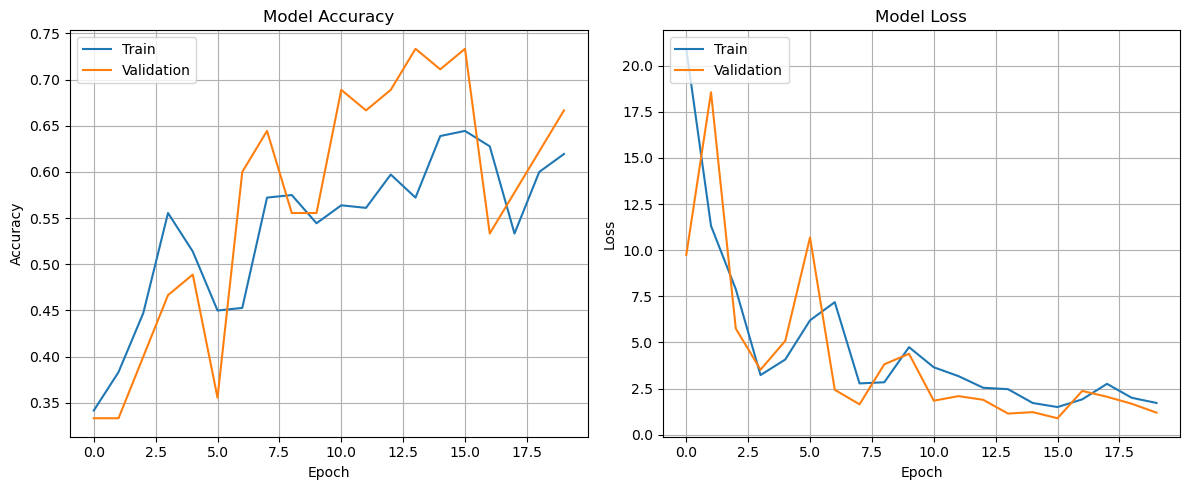

In [12]:
# Perbandingan Akurasi dan Loss
plt.figure(figsize=(12, 5))

# -------- Akurasi --------
plt.subplot(1, 2, 1)
# Plot data akurasi
plt.plot(hasil_1.history['accuracy'])
plt.plot(hasil_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)


# -------- Loss --------
plt.subplot(1, 2, 2)
# Plot data loss
plt.plot(hasil_1.history['loss'])
plt.plot(hasil_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)


plt.tight_layout()
plt.show()

## Prediksi ANN Pada Data Baru

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


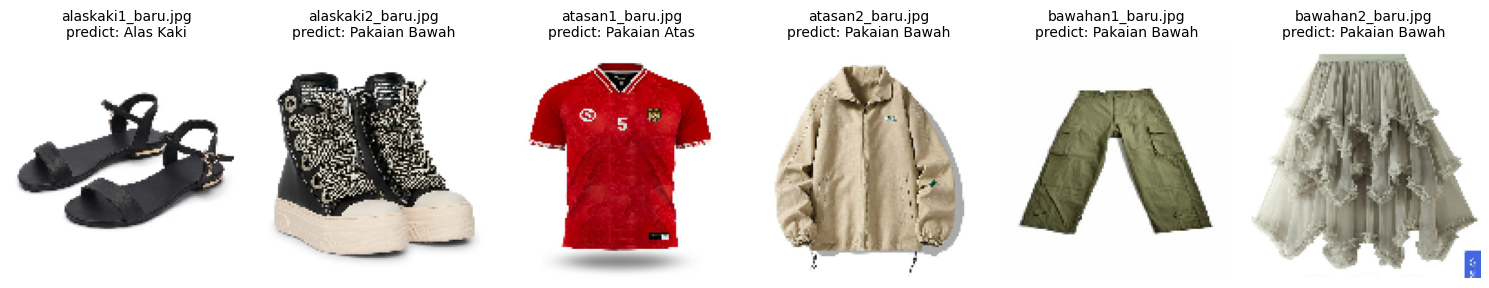

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path folder data baru
new_data_path = 'data_baru'

# Ukuran input model
image_size = (128, 128)

images = []
labels = []
file_names = []

# Looping semua gambar di folder
for file in os.listdir(new_data_path):
    if file.endswith(".jpg"):
        img_path = os.path.join(new_data_path, file)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        file_names.append(file)

# Konversi ke array numpy
images_np = np.array(images)

# Prediksi
predictions_ann = model_ann.predict(images_np)
predicted_classes_ann = np.argmax(predictions_ann, axis=1)
plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')
    pred_label = class_names[predicted_classes_ann[i]]
    plt.title(f'{file_names[i]}\npredict: {pred_label}', fontsize=10)

plt.tight_layout()
plt.show()

## Hyperparameter Tuning ANN

In [14]:
def build_model(hp):
    model = keras.Sequential()
    # Input layer
    model.add(keras.layers.Flatten(input_shape=(128, 128, 3)))
    # Hidden Layer 1
    model.add(keras.layers.Dense(
        units=hp.Int('units1', min_value=64, max_value=256, step=64),
        activation='relu',
        kernel_initializer='he_normal'
    ))
    # Hidden Layer 2
    model.add(keras.layers.Dense(
        units=hp.Int('units2', min_value=64, max_value=128, step=32),
        activation='relu',
        kernel_initializer='he_normal'
    ))
    # Hidden Layer 3
    model.add(keras.layers.Dense(
        units=hp.Int('units3', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_initializer='he_normal'
    ))
    # Output layer (3 kelas)
    model.add(keras.layers.Dense(3, activation='softmax', kernel_initializer='glorot_uniform'))
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Buat tuner (gunakan RandomSearch agar ringan)
# Inisialisasi tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='ann_tuning_3hidden'
)

# Mulai pencarian
tuner.search(train_set, epochs=20, validation_data=val_set)

# Ambil model terbaik
best_ann = tuner.get_best_models(num_models=1)[0]
best_ann.summary()

Reloading Tuner from tuning_dir\ann_tuning_3hidden\tuner0.json



d:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,145,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,154,307 (12.03 MB)

 Trainable params: 3,154,307 (12.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Evaluasi Hyperparameter Tuning ANN
loss, accuracy = best_ann.evaluate(test_set)
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Loss   : {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7641 - loss: 0.5953
Akurasi: 75.56%
Loss   : 0.60


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


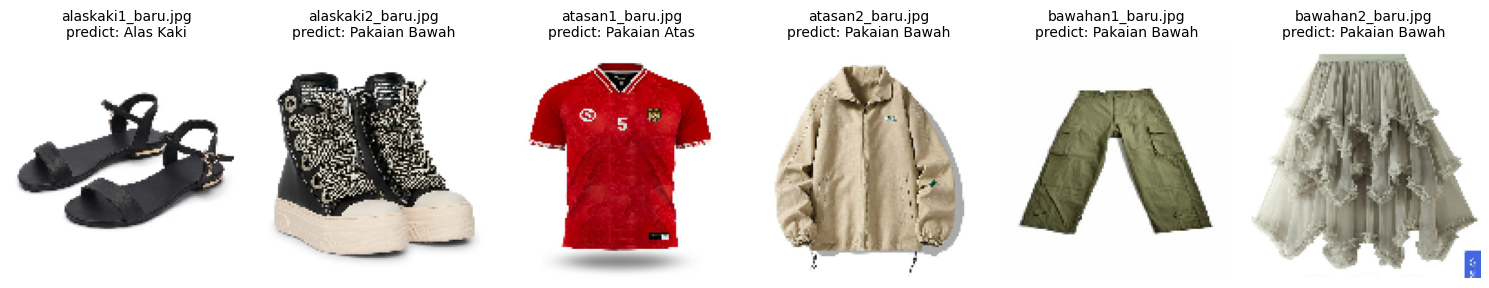

In [16]:
# Prediksi
predictions_best_ann = best_ann.predict(images_np)
predicted_classes_best_ann = np.argmax(predictions_best_ann, axis=1)

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')
    pred_label = class_names[predicted_classes_best_ann[i]]
    plt.title(f'{file_names[i]}\npredict: {pred_label}', fontsize=10)

plt.tight_layout()
plt.show()

# **Implementasi CNN untuk Klasifikasi**

## Arsitektur, Pelatihan, dan Evaluasi CNN

In [17]:
# Model CNN
model_cnn = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    # Blok Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    # Blok Konvolusi 3
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    # Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax', kernel_initializer='glorot_uniform')
])

model_cnn.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile Model CNN
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compile Model CNN
hasil_2 = model_cnn.fit(train_set, validation_data=val_set, epochs=20)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 580ms/step - accuracy: 0.3458 - loss: 5.1871 - val_accuracy: 0.6222 - val_loss: 0.8779
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.5416 - loss: 0.9465 - val_accuracy: 0.6889 - val_loss: 0.6712
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 529ms/step - accuracy: 0.6666 - loss: 0.7838 - val_accuracy: 0.8222 - val_loss: 0.4719
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step - accuracy: 0.7415 - loss: 0.6166 - val_accuracy: 0.8444 - val_loss: 0.4319
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 548ms/step - accuracy: 0.7376 - loss: 0.6333 - val_accuracy: 0.8000 - val_loss: 0.3889
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step - accuracy: 0.7732 - loss: 0.6041 - val_accuracy: 0.8889 - val_loss: 0.2836
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 620ms/step - accuracy: 0.7749 - loss: 0.5842 - val_accuracy: 0.8889 - val_loss: 0.3442
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 599ms/step - accuracy: 0.8178 - loss: 0.4671 - val_accuracy: 0.

In [19]:
# Evaluasi Model CNN Pada Data Uji
loss, accuracy = model_cnn.evaluate(test_set)
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Loss   : {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8694 - loss: 0.3594
Akurasi: 86.67%
Loss   : 0.35


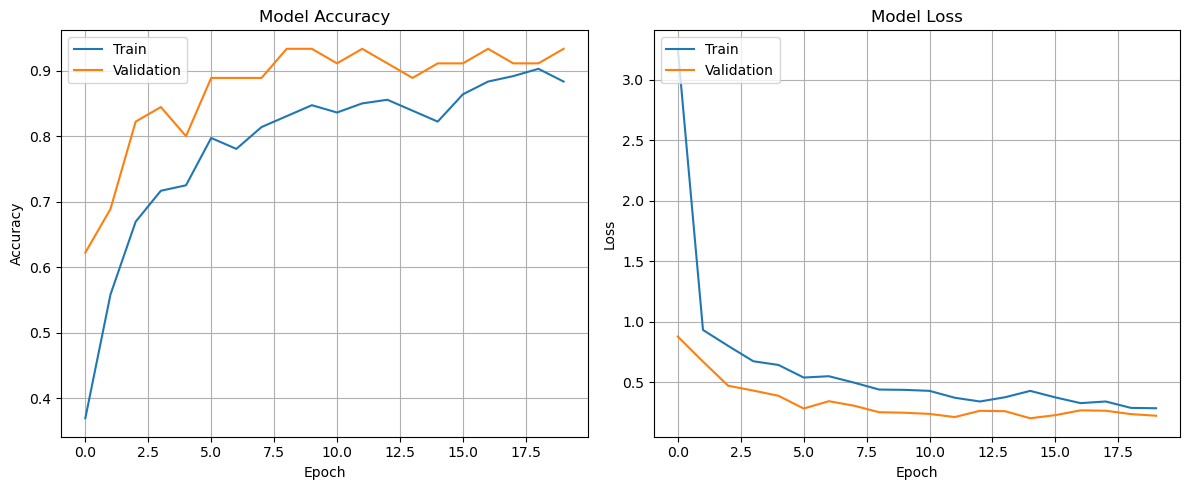

In [20]:
# Perbandingan Akurasi dan Loss
plt.figure(figsize=(12, 5))

# -------- Akurasi --------
plt.subplot(1, 2, 1)
# Plot data akurasi
plt.plot(hasil_2.history['accuracy'])
plt.plot(hasil_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)


# -------- Loss --------
plt.subplot(1, 2, 2)
# Plot data loss
plt.plot(hasil_2.history['loss'])
plt.plot(hasil_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)



plt.tight_layout()
plt.show()

## Prediksi CNN Pada Data Baru

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


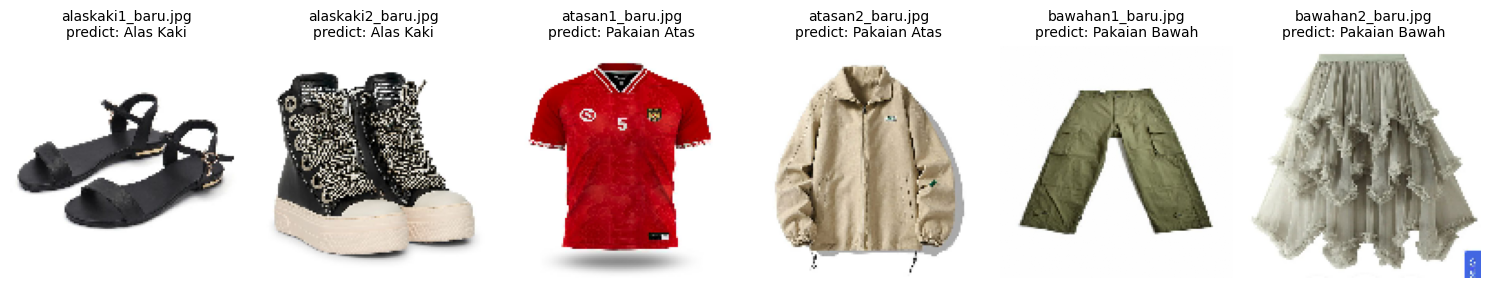

In [39]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path folder data baru
new_data_path = 'data_baru'

# Ukuran input model
image_size = (128, 128)

images = []
labels = []
file_names = []

# Looping semua gambar di folder
for file in os.listdir(new_data_path):
    if file.endswith(".jpg"):
        img_path = os.path.join(new_data_path, file)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize (sama seperti val_datagen)
        images.append(img_array)
        file_names.append(file)

# Konversi ke array numpy
images_np = np.array(images)

# Prediksi
predictions_cnn = model_cnn.predict(images_np)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')
    pred_label = class_names[predicted_classes_cnn[i]]
    plt.title(f'{file_names[i]}\npredict: {pred_label}', fontsize=10)

plt.tight_layout()
plt.show()


## Hyperparameter Tuning CNN

In [22]:
def build_cnn_model(hp):
    model = keras.Sequential()

    # Blok Konvolusi 1
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        input_shape=(128, 128, 3)
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Blok Konvolusi 2
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        kernel_initializer='he_normal'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Blok Konvolusi 3
    model.add(layers.Conv2D(
        filters=hp.Int('conv3_filters', min_value=128, max_value=256, step=64),
        kernel_size=(3, 3),
        activation='relu',
        kernel_initializer='he_normal'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # FC Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=128, step=32),
        activation='relu',
        kernel_initializer='he_normal'
    ))
    model.add(layers.Dropout(hp.Choice('dropout_rate', values=[0.3, 0.5])))

    # Output Layer (3 kelas)
    model.add(layers.Dense(3, activation='softmax', kernel_initializer='glorot_uniform'))

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('lr', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='cnn_tuning_3conv'
)

tuner.search(train_set, epochs=20, validation_data=val_set)

# Model terbaik
best_cnn = tuner.get_best_models(num_models=1)[0]
best_cnn.summary()

Reloading Tuner from tuning_dir\cnn_tuning_3conv\tuner0.json


d:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │     4,816,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,984,387 (19.01 MB)

 Trainable params: 4,984,387 (19.01 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
tuner.results_summary()

Results summary
Results in tuning_dir\cnn_tuning_3conv
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
conv1_filters: 32
conv2_filters: 64
conv3_filters: 256
dense_units: 96
dropout_rate: 0.5
lr: 0.001
Score: 0.9555555582046509

Trial 1 summary
Hyperparameters:
conv1_filters: 16
conv2_filters: 96
conv3_filters: 128
dense_units: 96
dropout_rate: 0.5
lr: 0.0001
Score: 0.9555555582046509

Trial 2 summary
Hyperparameters:
conv1_filters: 16
conv2_filters: 128
conv3_filters: 128
dense_units: 64
dropout_rate: 0.3
lr: 0.0001
Score: 0.9555555582046509

Trial 0 summary
Hyperparameters:
conv1_filters: 48
conv2_filters: 96
conv3_filters: 256
dense_units: 96
dropout_rate: 0.3
lr: 0.0001
Score: 0.9333333373069763

Trial 3 summary
Hyperparameters:
conv1_filters: 48
conv2_filters: 96
conv3_filters: 256
dense_units: 96
dropout_rate: 0.5
lr: 0.0001
Score: 0.9111111164093018


In [24]:
# Evaluasi Model CNN Pada Data Uji
loss, accuracy = best_cnn.evaluate(test_set)
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Loss   : {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.8294 - loss: 0.6032
Akurasi: 82.22%
Loss   : 0.61


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


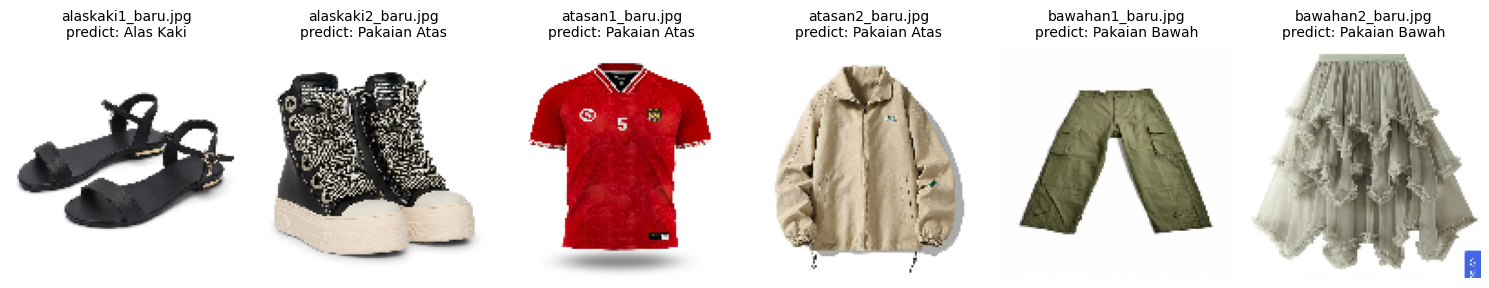

In [25]:
# Prediksi
predictions_cnn = best_cnn.predict(images_np)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')
    pred_label = class_names[predicted_classes_cnn[i]]
    plt.title(f'{file_names[i]}\npredict: {pred_label}', fontsize=10)

plt.tight_layout()
plt.show()

# **Menyimpan Model**

In [28]:
model_cnn.save('Model Saved.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


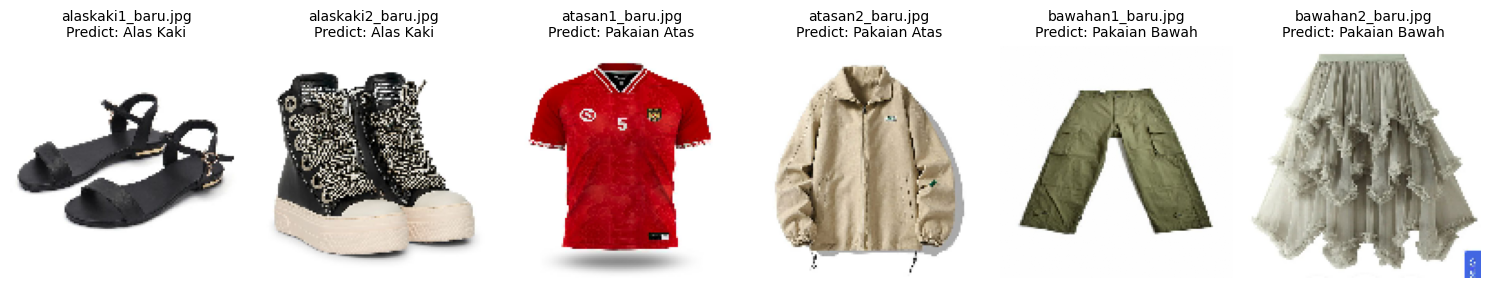

In [40]:
from tensorflow.keras.models import load_model

# Load model CNN dari file .h5
loaded_cnn = load_model(r'D:\SEMESTER 6\AI for DS\klasifikasi_outfit\Model Saved.h5')

# Prediksi menggunakan model yang dimuat
predictions_cnn = loaded_cnn.predict(images_np)

# Konversi probabilitas ke kelas
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')
    pred_label = class_names[predicted_classes_cnn[i]]
    plt.title(f'{file_names[i]}\nPredict: {pred_label}', fontsize=10)

plt.tight_layout()
plt.show()
